In [1]:
# --------------------------------------------
# Create virtual display (Google Colab)
# --------------------------------------------
!pip install svgling
!apt-get install -y xvfb ghostscript python3-tk # Install X Virtual Frame Buffer and other dependencies
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ghostscript is already the newest version (9.55.0~dfsg1-0ubuntu5.12).
python3-tk is already the newest version (3.10.8-1~22.04).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import time
import json
import pprint
from pprint import pprint
import nltk
from textblob import TextBlob
import re
import string
from nltk.tree import Tree
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk import pos_tag, FreqDist, ConditionalFreqDist, CFG
from nltk.util import bigrams
from nltk.tag import RegexpTagger
from nltk.probability import ConditionalProbDist, MLEProbDist, LidstoneProbDist
from nltk.parse.chart import ChartParser
from nltk.lm import MLE, Laplace
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.util import ngrams
from IPython.display import display

In [3]:
# Downloads
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# Function for cleaner display format - Miyoko
def print_in_chunks(token_list, chunk_size=5):
    for i in range(0, len(token_list), chunk_size):
        print(token_list[i:i+chunk_size])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
# -----------------------------
# Import Repo from github
# -----------------------------
!git clone https://github.com/MiyokoPang/TXSA.git

In [4]:
# -----------------------------
# Data_1.txt Import
# -----------------------------
with open("TXSA/Data_1.txt", "r", encoding="utf-8") as file:
    data_1 = file.read()

In [5]:
# Q1 Word Tokenization
# split() function - Miyoko Pang
print('Q1 split function')
start = time.time()
tokenization_1 = data_1.split()
end = time.time()
print_in_chunks(tokenization_1, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q1 split function
['Classification', 'is', 'the', 'task', 'of']
['choosing', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input.', 'In']
['basic', 'classification', 'tasks,', 'each', 'input']
['is', 'considered', 'in', 'isolation', 'from']
['all', 'other', 'inputs,', 'and', 'the']
['set', 'of', 'labels', 'is', 'defined']
['in', 'advance.', 'The', 'basic', 'classification']
['task', 'has', 'a', 'number', 'of']
['interesting', 'variants.', 'For', 'example,', 'in']
['multiclass', 'classification,', 'each', 'instance', 'may']
['be', 'assigned', 'multiple', 'labels;', 'in']
['open-class', 'classification,', 'the', 'set', 'of']
['labels', 'is', 'not', 'defined', 'in']
['advance;', 'and', 'in', 'sequence', 'classification,']
['a', 'list', 'of', 'inputs', 'are']
['jointly', 'classified.']
Time taken: 107.53 ms


In [7]:
# Regular Expression function - Yi Jing
print('Q1 RE function')
start_time = time.time()
tokens = re.findall(r'\b\w+\b', data_1)
end_time = time.time()

print_in_chunks(tokens)
print(f"\nTotal number of tokens: {len(tokens)}")
print(f"Time taken: {(end_time - start_time) * 1000000:.2f} µs")

Q1 RE function
['Classification', 'is', 'the', 'task', 'of']
['choosing', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input', 'In']
['basic', 'classification', 'tasks', 'each', 'input']
['is', 'considered', 'in', 'isolation', 'from']
['all', 'other', 'inputs', 'and', 'the']
['set', 'of', 'labels', 'is', 'defined']
['in', 'advance', 'The', 'basic', 'classification']
['task', 'has', 'a', 'number', 'of']
['interesting', 'variants', 'For', 'example', 'in']
['multiclass', 'classification', 'each', 'instance', 'may']
['be', 'assigned', 'multiple', 'labels', 'in']
['open', 'class', 'classification', 'the', 'set']
['of', 'labels', 'is', 'not', 'defined']
['in', 'advance', 'and', 'in', 'sequence']
['classification', 'a', 'list', 'of', 'inputs']
['are', 'jointly', 'classified']

Total number of tokens: 83
Time taken: 217.91 µs


In [8]:
# NLTK function - Shu Hui
print('Q1 NLTK function')
start = time.time()
tokenization = word_tokenize(data_1)
end = time.time()
print_in_chunks(tokenization, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q1 NLTK function
['Classification', 'is', 'the', 'task', 'of']
['choosing', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input', '.']
['In', 'basic', 'classification', 'tasks', ',']
['each', 'input', 'is', 'considered', 'in']
['isolation', 'from', 'all', 'other', 'inputs']
[',', 'and', 'the', 'set', 'of']
['labels', 'is', 'defined', 'in', 'advance']
['.', 'The', 'basic', 'classification', 'task']
['has', 'a', 'number', 'of', 'interesting']
['variants', '.', 'For', 'example', ',']
['in', 'multiclass', 'classification', ',', 'each']
['instance', 'may', 'be', 'assigned', 'multiple']
['labels', ';', 'in', 'open-class', 'classification']
[',', 'the', 'set', 'of', 'labels']
['is', 'not', 'defined', 'in', 'advance']
[';', 'and', 'in', 'sequence', 'classification']
[',', 'a', 'list', 'of', 'inputs']
['are', 'jointly', 'classified', '.']
Time taken: 40801.76 ms


In [9]:
# Q1.3: Stop Words & Punctuation Removal - Yi Jing
print("Q1.3 Stop Words & Punctuation Removal")
start_time = time.time()

# Tokenize
tokens = word_tokenize(data_1)

# Prepare stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Remove stop words and punctuation
filtered_tokens = []
found_stopwords = []

for word in tokens:
    word_lower = word.lower()
    if word_lower in stop_words:
        found_stopwords.append(word_lower)
    elif word not in punctuation:
        filtered_tokens.append(word)

end_time = time.time()

# Print results
print("Original Token Count:", len(tokens))
print("Filtered Token Count:", len(filtered_tokens))

print("\nFiltered Tokens:")
print_in_chunks(filtered_tokens)

print("\nStop Words Found and Removed:")
print_in_chunks(found_stopwords)

print(f"\nTotal Stop Words Removed: {len(found_stopwords)}")
print(f"Time taken: {(end_time - start_time) * 1000000:.2f} µs")

print('-----------------------------')


Q1.3 Stop Words & Punctuation Removal
Original Token Count: 94
Filtered Token Count: 45

Filtered Tokens:
['Classification', 'task', 'choosing', 'correct', 'class']
['label', 'given', 'input', 'basic', 'classification']
['tasks', 'input', 'considered', 'isolation', 'inputs']
['set', 'labels', 'defined', 'advance', 'basic']
['classification', 'task', 'number', 'interesting', 'variants']
['example', 'multiclass', 'classification', 'instance', 'may']
['assigned', 'multiple', 'labels', 'open-class', 'classification']
['set', 'labels', 'defined', 'advance', 'sequence']
['classification', 'list', 'inputs', 'jointly', 'classified']

Stop Words Found and Removed:
['is', 'the', 'of', 'the', 'for']
['a', 'in', 'each', 'is', 'in']
['from', 'all', 'other', 'and', 'the']
['of', 'is', 'in', 'the', 'has']
['a', 'of', 'for', 'in', 'each']
['be', 'in', 'the', 'of', 'is']
['not', 'in', 'and', 'in', 'a']
['of', 'are']

Total Stop Words Removed: 37
Time taken: 6453.28 µs
-----------------------------


In [10]:
# Q2 Form Word Stemming
# Regular Expression function - Yi Jing
print('Q2 RE function')
start_time = time.time()
tokens = re.findall(r'\b\w+\b', data_1)

def simple_stem(word):
    return re.sub(r'(ing|ed|ly|es|s)$', '', word)

stemmed_tokens = [simple_stem(token.lower()) for token in tokens]
end_time = time.time()

print_in_chunks(stemmed_tokens)

print(f"Time taken: {(end_time - start_time) * 1000000:.2f} µs")


Q2 RE function
['classification', 'i', 'the', 'task', 'of']
['choos', 'the', 'correct', 'clas', 'label']
['for', 'a', 'given', 'input', 'in']
['basic', 'classification', 'task', 'each', 'input']
['i', 'consider', 'in', 'isolation', 'from']
['all', 'other', 'input', 'and', 'the']
['set', 'of', 'label', 'i', 'defin']
['in', 'advance', 'the', 'basic', 'classification']
['task', 'ha', 'a', 'number', 'of']
['interest', 'variant', 'for', 'example', 'in']
['multiclas', 'classification', 'each', 'instance', 'may']
['be', 'assign', 'multiple', 'label', 'in']
['open', 'clas', 'classification', 'the', 'set']
['of', 'label', 'i', 'not', 'defin']
['in', 'advance', 'and', 'in', 'sequence']
['classification', 'a', 'list', 'of', 'input']
['are', 'joint', 'classifi']
Time taken: 504.26 µs


In [11]:
# NLTK PorterStemmer function - Miyoko Pang
print('Q2 PorterStemmer function')
start = time.time()
ps = PorterStemmer()
porter_stems = [ps.stem(w) for w in word_tokenize(data_1)]
end = time.time()
print_in_chunks(porter_stems, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q2 PorterStemmer function
['classif', 'is', 'the', 'task', 'of']
['choos', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input', '.']
['in', 'basic', 'classif', 'task', ',']
['each', 'input', 'is', 'consid', 'in']
['isol', 'from', 'all', 'other', 'input']
[',', 'and', 'the', 'set', 'of']
['label', 'is', 'defin', 'in', 'advanc']
['.', 'the', 'basic', 'classif', 'task']
['ha', 'a', 'number', 'of', 'interest']
['variant', '.', 'for', 'exampl', ',']
['in', 'multiclass', 'classif', ',', 'each']
['instanc', 'may', 'be', 'assign', 'multipl']
['label', ';', 'in', 'open-class', 'classif']
[',', 'the', 'set', 'of', 'label']
['is', 'not', 'defin', 'in', 'advanc']
[';', 'and', 'in', 'sequenc', 'classif']
[',', 'a', 'list', 'of', 'input']
['are', 'jointli', 'classifi', '.']
Time taken: 2041.58 ms


In [12]:
# NLTK LancasterStemmer function - Shu Hui
print('Q2 LancasterStemmer function')
start = time.time()
ls = LancasterStemmer()
lancaster_stems = [ls.stem(w) for w in word_tokenize(data_1)]
end = time.time()
print_in_chunks(lancaster_stems, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q2 LancasterStemmer function
['class', 'is', 'the', 'task', 'of']
['choos', 'the', 'correct', 'class', 'label']
['for', 'a', 'giv', 'input', '.']
['in', 'bas', 'class', 'task', ',']
['each', 'input', 'is', 'consid', 'in']
['isol', 'from', 'al', 'oth', 'input']
[',', 'and', 'the', 'set', 'of']
['label', 'is', 'defin', 'in', 'adv']
['.', 'the', 'bas', 'class', 'task']
['has', 'a', 'numb', 'of', 'interest']
['vary', '.', 'for', 'exampl', ',']
['in', 'multiclass', 'class', ',', 'each']
['inst', 'may', 'be', 'assign', 'multipl']
['label', ';', 'in', 'open-class', 'class']
[',', 'the', 'set', 'of', 'label']
['is', 'not', 'defin', 'in', 'adv']
[';', 'and', 'in', 'sequ', 'class']
[',', 'a', 'list', 'of', 'input']
['ar', 'joint', 'class', '.']
Time taken: 2579.45 ms


In [13]:
# -----------------------------
# Data_2.txt Import
# -----------------------------
with open("TXSA/Data_2.txt", "r", encoding="utf-8") as file:
    data_2 = file.read()

print('-----------------------------')

-----------------------------


In [14]:
# Q3 POS Taggers and Syntactic Analysers
# NLTK POS tagger function - Shu Hui
print('Q3 NLTK POS Tagger')
start = time.time()
pos_nltk = pos_tag(word_tokenize(data_2))
end = time.time()
print_in_chunks(pos_nltk, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q3 NLTK POS Tagger
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD')]
[('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC')]
[('chased', 'VBD'), ('away', 'RB'), ('.', '.')]
Time taken: 417118.07 ms


In [15]:
# TextBlob POS Tagger - Miyoko Pang
print('Q3 TextBlob POS Tagger')
start = time.time()
blob = TextBlob(data_2)
blob_pos = blob.tags
end = time.time()
print_in_chunks(blob_pos, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q3 TextBlob POS Tagger
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD')]
[('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC')]
[('chased', 'VBD'), ('away', 'RB')]
Time taken: 1137.02 ms


In [16]:
# Regular Expression tagger - Yi Jing
print('Q3 Regular Expression POS Tagger')
start_time = time.time()
tokens = word_tokenize(data_2)

patterns = [
    (r'.*ing$', 'VBG'),                 # gerunds
    (r'.*ed$', 'VBD'),                  # past tense verbs
    (r'.*es$', 'VBZ'),                  # 3rd person singular present
    (r'.*ould$', 'MD'),                 # modals
    (r'.*\'s$', 'NN$'),                 # possessive nouns
    (r'.*s$', 'NNS'),                   # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),   # numbers
    (r'^(the|a|an)$', 'DT'),            # articles
    (r'^(and|or|but)$', 'CC'),          # conjunctions
    (r'^(at|in|on|with|away)$', 'IN'),  # prepositions
    (r'.*', 'NN')                       # default
]

regexp_tagger = RegexpTagger(patterns)
tagged = regexp_tagger.tag(tokens)
end_time = time.time()

for word, tag in tagged:
    print(f"{word:<10} => {tag}")
print(f"\nTime taken: {(end_time - start_time) * 1000000:.2f} ms")


Q3 Regular Expression POS Tagger
The        => NN
big        => NN
black      => NN
dog        => NN
barked     => VBD
at         => IN
the        => DT
white      => NN
cat        => NN
and        => CC
chased     => VBD
away       => IN
.          => NN

Time taken: 1271.96 ms


Tokens: ['the', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away']
                          S                                    
      ____________________|____________                         
     |                                 VP                      
     |               __________________|____________________    
     |              |             PP            |     |     |  
     |              |      _______|____         |     |     |   
     NP             |     |            NP       |     |     |  
  ___|_________     |     |    ________|____    |     |     |   
Det Adj  Adj   N    V     P  Det      Adj   N  Conj   V    Adv 
 |   |    |    |    |     |   |        |    |   |     |     |   
the big black dog barked  at the     white cat and  chased away



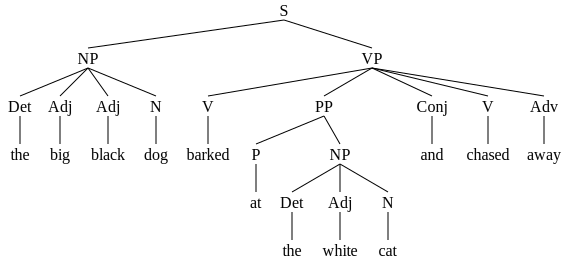


Time taken to generate parse tree: 1540.66 ms
-----------------------------


In [17]:
# Possible Parse Trees - Miyoko and Yi Jing
sentence = re.sub(r'[^\w\s]', '', data_2).lower().split()
print("Tokens:", sentence)
grammar = CFG.fromstring("""
  S -> NP VP
  NP -> Det Adj Adj N
  NP -> Det Adj N
  VP -> V PP Conj V Adv
  PP -> P NP
  Det -> 'the'
  Adj -> 'big' | 'black' | 'white'
  N -> 'dog' | 'cat'
  V -> 'barked' | 'chased'
  P -> 'at'
  Conj -> 'and'
  Adv -> 'away'
""")
parser = ChartParser(grammar)
start = time.time()
trees = list(parser.parse(sentence))
end = time.time()
if not trees:
    print("No valid parse tree could be generated.")
else:
    for tree in trees:
        tree.pretty_print()
        #tree.draw()
        display(tree)
print(f"\nTime taken to generate parse tree: {(end - start) * 1000000:.2f} ms")

print('-----------------------------')

In [18]:
# -----------------------------
# Data_3.txt Import
# -----------------------------
with open("TXSA/Data_3.txt", "r", encoding="utf-8") as file:
    data_3 = file.read()

print('-----------------------------')

-----------------------------


In [19]:
# Q4 Sentence Probabilities - Bigram Models
print('Q4 Unsmoothed and Smoothed Bigram Model')
all_sentences = re.findall(r"<s>.*?</s>", data_3) # Extract wrapped sentences
test_sentence = all_sentences[-1]
train_sentences = all_sentences[:-1]
tokenized_train = [['<s>'] + s.replace('<s>', '').replace('</s>', '').strip().split() + ['</s>'] for s in train_sentences]

# Bigram Models (MLE and Laplace)
start = time.time()
n = 2
train_data_mle, padded_sents_mle = padded_everygram_pipeline(n, tokenized_train)
train_data_laplace, padded_sents_laplace = padded_everygram_pipeline(n, tokenized_train)
mle_model = MLE(n)
laplace_model = Laplace(n)
mle_model.fit(train_data_mle, padded_sents_mle)
laplace_model.fit(train_data_laplace, padded_sents_laplace)
test_tokens = ['<s>'] + test_sentence.replace('<s>', '').replace('</s>', '').strip().split() + ['</s>']
test_ngrams = list(ngrams(test_tokens, n))

# Calculate probabilities
prob_mle = 1.0
prob_laplace = 1.0
for w1, w2 in test_ngrams:
    mle_score = mle_model.score(w2, [w1])
    laplace_score = laplace_model.score(w2, [w1])
    print(f"Bigram ({w1}, {w2}): MLE={mle_score:.10f}, Laplace={laplace_score:.10f}")  # Debug line
    prob_mle *= mle_score
    prob_laplace *= laplace_score
end = time.time()
print(f"Test Sentence: {' '.join(test_tokens)}")
print(f"MLE Bigram Probability: {prob_mle:.10f}")
print(f"Laplace-smoothed Bigram Probability: {prob_laplace:.10f}")
print(f"\nTime taken to generate bigram probabilities: {(end - start) * 1000:.2f} ms")

print('-----------------------------')

Q4 Unsmoothed and Smoothed Bigram Model
Bigram (<s>, I): MLE=0.1666666667, Laplace=0.1176470588
Bigram (I, read): MLE=1.0000000000, Laplace=0.1666666667
Bigram (read, a): MLE=1.0000000000, Laplace=0.2857142857
Bigram (a, different): MLE=0.3333333333, Laplace=0.1428571429
Bigram (different, book): MLE=1.0000000000, Laplace=0.1666666667
Bigram (book, by): MLE=0.3333333333, Laplace=0.1428571429
Bigram (by, Danielle): MLE=1.0000000000, Laplace=0.1666666667
Bigram (Danielle, </s>): MLE=1.0000000000, Laplace=0.1666666667
Test Sentence: <s> I read a different book by Danielle </s>
MLE Bigram Probability: 0.0185185185
Laplace-smoothed Bigram Probability: 0.0000005293

Time taken to generate bigram probabilities: 2.70 ms
-----------------------------


In [20]:
# Q5 Individual Work Assignments
# Miyoko Pang
print('Q5 TreebankWordTokenizer function')
from nltk.tokenize import TreebankWordTokenizer
data_1_clean = data_1.replace('\n', ' ').strip()
start = time.time()
treebank_tokenizer = TreebankWordTokenizer()
tokens = treebank_tokenizer.tokenize(data_1_clean)
end = time.time()
print_in_chunks(tokens, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q5 TreebankWordTokenizer function
['Classification', 'is', 'the', 'task', 'of']
['choosing', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input.', 'In']
['basic', 'classification', 'tasks', ',', 'each']
['input', 'is', 'considered', 'in', 'isolation']
['from', 'all', 'other', 'inputs', ',']
['and', 'the', 'set', 'of', 'labels']
['is', 'defined', 'in', 'advance.', 'The']
['basic', 'classification', 'task', 'has', 'a']
['number', 'of', 'interesting', 'variants.', 'For']
['example', ',', 'in', 'multiclass', 'classification']
[',', 'each', 'instance', 'may', 'be']
['assigned', 'multiple', 'labels', ';', 'in']
['open-class', 'classification', ',', 'the', 'set']
['of', 'labels', 'is', 'not', 'defined']
['in', 'advance', ';', 'and', 'in']
['sequence', 'classification', ',', 'a', 'list']
['of', 'inputs', 'are', 'jointly', 'classified']
['.']
Time taken: 602.01 ms


In [21]:
# Yi Jing
print("Q5 spaCy Tokenizer")
import spacy
nlp = spacy.load("en_core_web_sm")

# Clean newline and extra whitespace
clean_data_1 = re.sub(r'\s+', ' ', data_1.strip())

start = time.time()
doc = nlp(clean_data_1)
tokens = [token.text for token in doc]
end = time.time()

print_in_chunks(tokens)
print(f"\nTotal Tokens: {len(tokens)}")
print(f"Time taken: {(end - start) * 1000000:.2f} µs")

Q5 spaCy Tokenizer
['Classification', 'is', 'the', 'task', 'of']
['choosing', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input', '.']
['In', 'basic', 'classification', 'tasks', ',']
['each', 'input', 'is', 'considered', 'in']
['isolation', 'from', 'all', 'other', 'inputs']
[',', 'and', 'the', 'set', 'of']
['labels', 'is', 'defined', 'in', 'advance']
['.', 'The', 'basic', 'classification', 'task']
['has', 'a', 'number', 'of', 'interesting']
['variants', '.', 'For', 'example', ',']
['in', 'multiclass', 'classification', ',', 'each']
['instance', 'may', 'be', 'assigned', 'multiple']
['labels', ';', 'in', 'open', '-']
['class', 'classification', ',', 'the', 'set']
['of', 'labels', 'is', 'not', 'defined']
['in', 'advance', ';', 'and', 'in']
['sequence', 'classification', ',', 'a', 'list']
['of', 'inputs', 'are', 'jointly', 'classified']
['.']

Total Tokens: 96
Time taken: 44330.12 µs


In [22]:
# Shu Hui
print('Q5 Alternative Tokenizer - WordPunctTokenizer')
from nltk.tokenize import WordPunctTokenizer
import time

# Clean the data
data_1_clean2 = data_1.replace('\n', ' ').strip()

start = time.time()
wordpunct_tokenizer = WordPunctTokenizer()
tokens = wordpunct_tokenizer.tokenize(data_1_clean2)
end = time.time()

print_in_chunks(tokens, 5)
print(f"Time taken: {(end - start) * 1000000:.2f} ms")

Q5 Alternative Tokenizer - WordPunctTokenizer
['Classification', 'is', 'the', 'task', 'of']
['choosing', 'the', 'correct', 'class', 'label']
['for', 'a', 'given', 'input', '.']
['In', 'basic', 'classification', 'tasks', ',']
['each', 'input', 'is', 'considered', 'in']
['isolation', 'from', 'all', 'other', 'inputs']
[',', 'and', 'the', 'set', 'of']
['labels', 'is', 'defined', 'in', 'advance']
['.', 'The', 'basic', 'classification', 'task']
['has', 'a', 'number', 'of', 'interesting']
['variants', '.', 'For', 'example', ',']
['in', 'multiclass', 'classification', ',', 'each']
['instance', 'may', 'be', 'assigned', 'multiple']
['labels', ';', 'in', 'open', '-']
['class', 'classification', ',', 'the', 'set']
['of', 'labels', 'is', 'not', 'defined']
['in', 'advance', ';', 'and', 'in']
['sequence', 'classification', ',', 'a', 'list']
['of', 'inputs', 'are', 'jointly', 'classified']
['.']
Time taken: 321.15 ms
